In [1]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
import re
from gensim.models import Word2Vec
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

C:\Users\Maedr3\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
Using TensorFlow backend.


In [2]:
plt.rcParams['figure.figsize'] = [10, 10]

In [3]:
data = pd.read_csv('../../chapter 8/data/movie_reviews.csv', encoding='latin-1')

In [4]:
data.shape

(25000, 2)

In [5]:
data.SentimentText = data.SentimentText.str.lower()

In [6]:
def clean_str(string):
    
    string = re.sub(r"https?\://\S+", '', string)
    string = re.sub(r'\<a href', ' ', string)
    string = re.sub(r'&amp;', '', string) 
    string = re.sub(r'<br />', ' ', string)
    string = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', string)
    string = re.sub('\d','', string)
    string = re.sub(r"can\'t", "cannot", string)
    string = re.sub(r"it\'s", "it is", string)
    return string

In [7]:
data.SentimentText = data.SentimentText.apply(lambda x: clean_str(str(x)))

In [8]:
pd.Series(' '.join(data['SentimentText']).split()).value_counts().head(10)

movie    43558
film     39095
it       30659
one      26509
is       20355
like     20270
good     15099
the      13913
time     12682
even     12656
dtype: int64

In [9]:
stop_words = stopwords.words('english') + ['movie', 'film', 'time']
stop_words = set(stop_words)
remove_stop_words = lambda r: [[word for word in word_tokenize(sente) if word not in stop_words] for sente in sent_tokenize(r)]
data['SentimentText'] = data['SentimentText'].apply(remove_stop_words)

In [10]:
data['SentimentText'][0] 

[['first',
  'think',
  'another',
  'disney',
  'might',
  'good',
  'kids',
  'watch',
  'help',
  'enjoy',
  'ages',
  'love',
  'first',
  'saw',
  'years',
  'later',
  'still',
  'love',
  'danny',
  'glover',
  'superb',
  'could',
  'play',
  'part',
  'better',
  'christopher',
  'lloyd',
  'hilarious',
  'perfect',
  'part',
  'tony',
  'danza',
  'believable',
  'mel',
  'clark',
  'help',
  'enjoy',
  'give']]

In [11]:
data['SentimentText'] = data['SentimentText'].apply(lambda x: x[0])

In [19]:
model = Word2Vec(
        data['SentimentText'],
        iter=10,
        size=100,
        window=5,
        min_count=5,
        workers=10)

In [20]:
vocab = list(model.wv.vocab)

In [21]:
len(vocab)

28838

In [22]:
model.wv.most_similar('insight')

[('insights', 0.7341898679733276),
 ('perspective', 0.7136699557304382),
 ('understanding', 0.6958176493644714),
 ('humanity', 0.6425720453262329),
 ('complexity', 0.6353663206100464),
 ('overwhelming', 0.6318362951278687),
 ('courage', 0.6294285655021667),
 ('ambiguity', 0.6231480836868286),
 ('appreciation', 0.6217454671859741),
 ('importance', 0.6216951012611389)]

In [23]:
model.wv.similarity(w1='happy', w2='sad')

0.5401219168065229

In [24]:
model.wv.similarity(w1='violent', w2='brutal')

0.8172468019549712

C:\Users\Maedr3\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


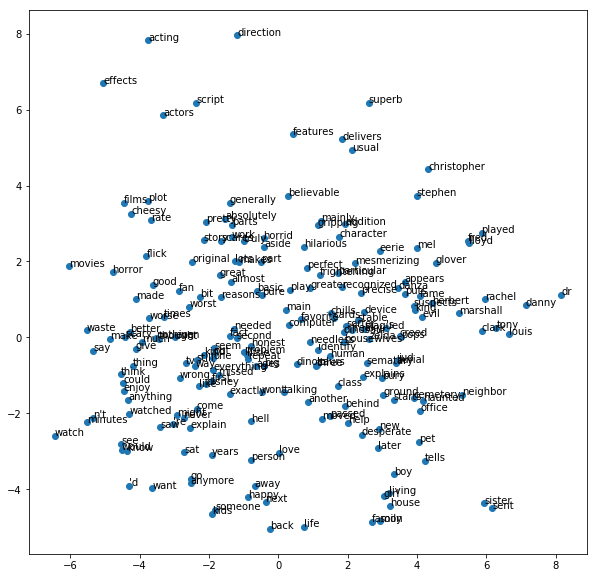

In [26]:
word_limit = 200
X = model[model.wv.vocab][:word_limit]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)[:word_limit]
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

In [28]:
model.wv.save_word2vec_format('movie_embedding.txt', binary=False)